In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
plt.style.use('fivethirtyeight')


/tmp/ipykernel_66058/2752778083.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [10]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,646.359985,648.799988,637.299988,643.380005,643.380005,14604900
1,2021-07-26,650.969971,668.200012,647.109985,657.619995,657.619995,25336600
2,2021-07-27,663.400024,666.500000,627.239990,644.780029,644.780029,32813300
3,2021-07-28,647.000000,654.969971,639.400024,646.979980,646.979980,16006600
4,2021-07-29,649.789978,683.690002,648.799988,677.349976,677.349976,30394600


In [11]:
df = df.loc[:,['Date','Close']]
df.head()

,Date,Close
0,2021-07-23,643.380005
1,2021-07-26,657.619995
2,2021-07-27,644.780029
3,2021-07-28,646.979980
4,2021-07-29,677.349976


In [12]:
#plot the data
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')

test.index = pd.to_datetime(test.index)
test.head()

,Close
Date,
2022-01-03,1199.780029
2022-01-04,1149.589966
2022-01-05,1088.119995
2022-01-06,1064.699951
2022-01-07,1026.959961


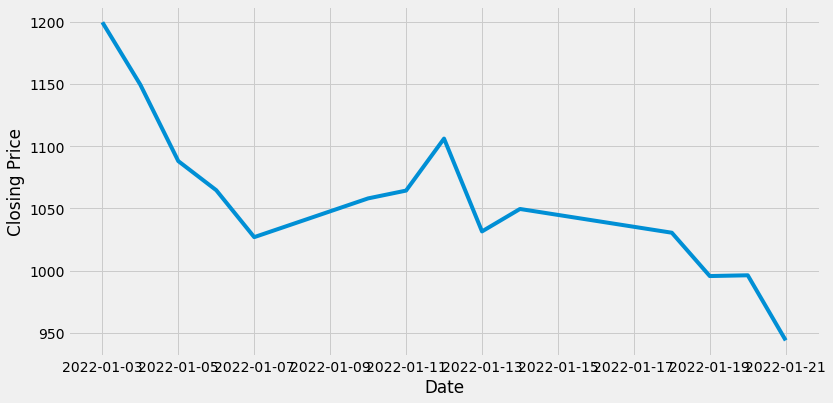

In [6]:
#plotting
plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

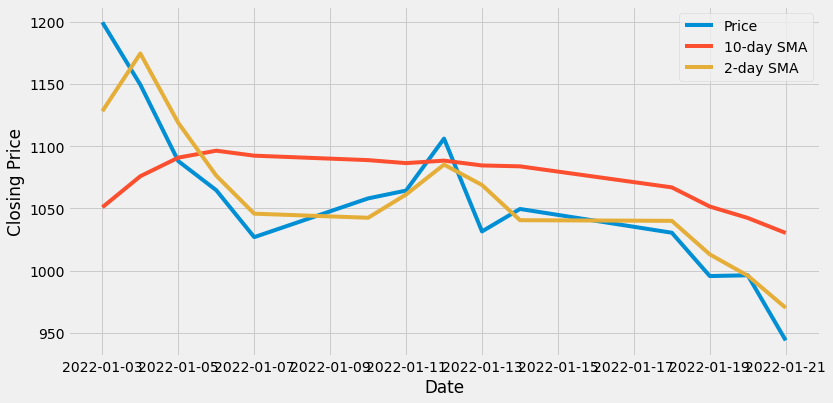

In [13]:
#Simple Moving Average - Rolling Mean - We can do rolling mean of the number of days - k value
sma10 = df['Close'].rolling(10).mean()
sma2 = df['Close'].rolling(2).mean()
#The above code is for finding 10-days SMA.  This is done on the dataset

df['10-day SMA'] = np.round(sma10,decimals=3)
df['2-day SMA'] = np.round(sma2,decimals=3)
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')
test.index = pd.to_datetime(test.index)



plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.plot(test['10-day SMA'],label='10-day SMA')
plt.plot(test['2-day SMA'],label='2-day SMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [16]:
test.head(10)

,Close,10-day SMA,2-day SMA
Date,,,
2022-01-03,1199.780029,1050.984,1128.280
2022-01-04,1149.589966,1075.949,1174.685
2022-01-05,1088.119995,1090.908,1118.855
2022-01-06,1064.699951,1096.491,1076.410
2022-01-07,1026.959961,1092.487,1045.830
2022-01-10,1058.119995,1088.905,1042.540
2022-01-11,1064.400024,1086.498,1061.260
2022-01-12,1106.219971,1088.501,1085.310
2022-01-13,1031.560059,1084.623,1068.890


In [9]:
#Laxmi look from here
#Finding the last date for the data available
#last_date = df['Date'].max()
#history = [x for x in df]
predictions = list()
#t = 3

for t in range(len(df)):
    #if (t!=0 && t!=1):
    #    print(df.loc[t+1]['Date'])
    #    print(df.loc[t+1]['2-day SMA'])
    if(t == 0 or t == 1):
        pred_value = np.NaN
    else:
        pred_value = df.loc[t-1]['2-day SMA']
    predictions.append(pred_value)
#Appending predictions to the dataset df
df.loc[:,'2-day Pred'] = predictions
#df.head(15)
df.tail(15)

,Date,Close,10-day SMA,2-day SMA,2-day Pred
112,2021-12-31,1056.780029,1024.263,1063.560,1078.265
113,2022-01-03,1199.780029,1050.984,1128.280,1063.560
114,2022-01-04,1149.589966,1075.949,1174.685,1128.280
115,2022-01-05,1088.119995,1090.908,1118.855,1174.685
116,2022-01-06,1064.699951,1096.491,1076.410,1118.855
117,2022-01-07,1026.959961,1092.487,1045.830,1076.410
118,2022-01-10,1058.119995,1088.905,1042.540,1045.830
119,2022-01-11,1064.400024,1086.498,1061.260,1042.540
120,2022-01-12,1106.219971,1088.501,1085.310,1061.260
121,2022-01-13,1031.560059,1084.623,1068.890,1085.310


In [10]:
df_new = df   


In [ ]:
df_new.tail(10)

In [11]:
#Calculating the predictions for the next 5 week days (no weekends) from current date based on the 2-day SMA
start_date = pd.to_datetime(df['Date'].max())
#print(start_date)
#print(type(start_date))
end_date = start_date + pd.DateOffset(days=7)

#print(type(end_date))
date_list_pred = list()
while start_date <= end_date:
    next_date = start_date + pd.DateOffset(days=1)
    prev_date = start_date + pd.DateOffset(days=-1)
    if not (next_date.weekday()==5 or next_date.weekday()==6):
        #df_new.loc[len(df_new.index)] = [next_date,np.nan,np.nan,np.nan,
        #
        #print(df_new.loc[len(df_new.index)-1]['2-day Pred'])
        #print(df_new.loc[len(df_new.index)-2]['2-day Pred'])
        sma2_pred = (df_new.loc[len(df_new.index)-1]['2-day Pred'] + df_new.loc[len(df_new.index)-2]['2-day Pred'])/2
        df_new.loc[len(df_new.index)] = [next_date,np.nan,np.nan,np.nan,sma2_pred]
    start_date = start_date + pd.DateOffset(days=1)
    #df_new.loc[len(df_new.index)] = [next_date,np.nan,np.nan,np.nan,np.nan]    
df_new.tail(10)


,Date,Close,10-day SMA,2-day SMA,2-day Pred
122,2022-01-14,1049.609985,1083.906,1040.585,1068.890
123,2022-01-18,1030.510010,1066.979,1040.060,1040.585
124,2022-01-19,995.650024,1051.585,1013.080,1040.060
125,2022-01-20,996.270020,1042.400,995.960,1013.080
126,2022-01-21,943.900024,1030.320,970.085,995.960
127,2022-01-24 00:00:00,NaN,NaN,NaN,1004.520
128,2022-01-25 00:00:00,NaN,NaN,NaN,1000.240
129,2022-01-26 00:00:00,NaN,NaN,NaN,1002.380
130,2022-01-27 00:00:00,NaN,NaN,NaN,1001.310
131,2022-01-28 00:00:00,NaN,NaN,NaN,1001.845


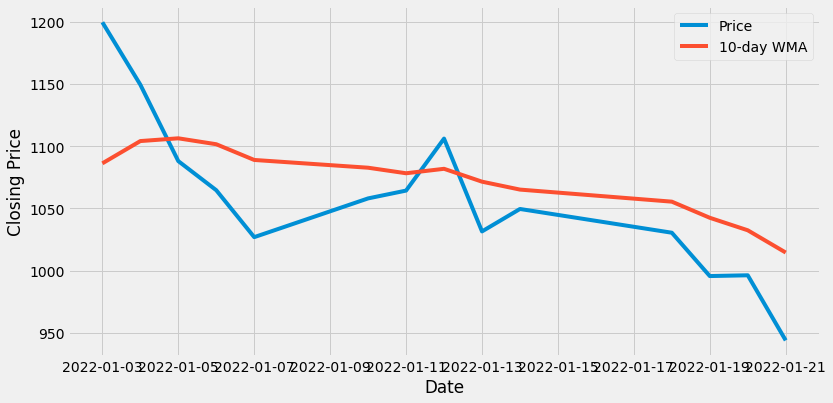

In [20]:
#Weighted moving average - for 10 days
weights = np.arange(1,11)
weights
wma10 = df['Close'].rolling(10).apply(lambda price: np.dot(price,weights)/weights.sum(), raw = True)
wma10


df['10-day WMA'] = np.round(wma10,decimals=3)
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')
test.index = pd.to_datetime(test.index)



plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.plot(test['10-day WMA'],label='10-day WMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [18]:
np.dot([3,3],[2,5])

21

In [23]:
test.head(10)

,Close,10-day SMA,2-day SMA,10-day WMA
Date,,,,
2022-01-03,1199.780029,1050.984,1128.280,1086.309
2022-01-04,1149.589966,1075.949,1174.685,1104.237
2022-01-05,1088.119995,1090.908,1118.855,1106.450
2022-01-06,1064.699951,1096.491,1076.410,1101.685
2022-01-07,1026.959961,1092.487,1045.830,1089.043
2022-01-10,1058.119995,1088.905,1042.540,1082.795
2022-01-11,1064.400024,1086.498,1061.260,1078.339
2022-01-12,1106.219971,1088.501,1085.310,1081.925
2022-01-13,1031.560059,1084.623,1068.890,1071.572


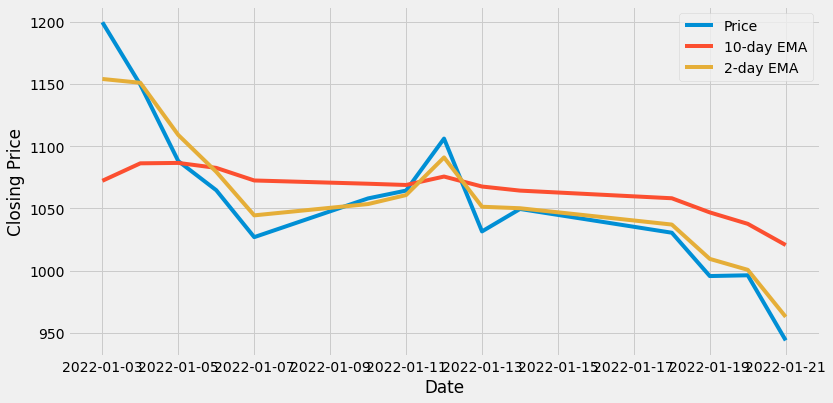

In [24]:
#Exponential moving average
ema10 = df['Close'].ewm(span=10,adjust= False).mean()
ema2 = df['Close'].ewm(span=2,adjust= False).mean()

df['10-day EMA'] = np.round(ema10,decimals=3)
df['2-day EMA'] = np.round(ema2,decimals=3)
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')
test.index = pd.to_datetime(test.index)



plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.plot(test['10-day EMA'],label='10-day EMA')
plt.plot(test['2-day EMA'],label='2-day EMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [25]:
df.head(10)

,Date,Close,10-day SMA,2-day SMA,10-day WMA,10-day EMA,2-day EMA
0,2021-07-23,643.380005,NaN,NaN,NaN,643.380,643.380
1,2021-07-26,657.619995,NaN,650.500,NaN,645.969,652.873
2,2021-07-27,644.780029,NaN,651.200,NaN,645.753,647.478
3,2021-07-28,646.979980,NaN,645.880,NaN,645.976,647.146
4,2021-07-29,677.349976,NaN,662.165,NaN,651.680,667.282
5,2021-07-30,687.200012,NaN,682.275,NaN,658.138,680.561
6,2021-08-02,709.669983,NaN,698.435,NaN,667.508,699.967
7,2021-08-03,709.739990,NaN,709.705,NaN,675.186,706.482
8,2021-08-04,710.919983,NaN,710.330,NaN,681.683,709.441
9,2021-08-05,714.630005,680.227,712.775,694.2,687.674,712.900


/home/ravi/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85455D+00    |proj g|=  3.34577D-04

At iterate    5    f=  4.85455D+00    |proj g|=  6.96510D-04

At iterate   10    f=  4.85455D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     15      1     0     0   0.000D+00   4.855D+00
  F =   4.8545452495092629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.94231D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   8.882D-08   4.942D+00
  F =   4.9423057751527457     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95392D+00    |proj g|=  8.42881D-05

At iterate    5    f=  4.95391D+00    |proj g|=  9.61009D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95357D+00    |proj g|=  1.60938D-04

At iterate    5    f=  4.95357D+00    |proj g|=  5.55733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     13      1     0     0   0.000D+00   4.954D+00
  F =   4.9535701526295375     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96366D+00    |proj g|=  7.52287D-05

At iterate    5    f=  4.96365D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     11      1     0     0   0.000D+00   4.964D+00
  F =   4.9636549274737654     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95806D+00    |proj g|=  7.75380D-05

At iterate    5    f=  4.95806D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   0.000D+00   4.958D+00
  F =   4.9580605197467724     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


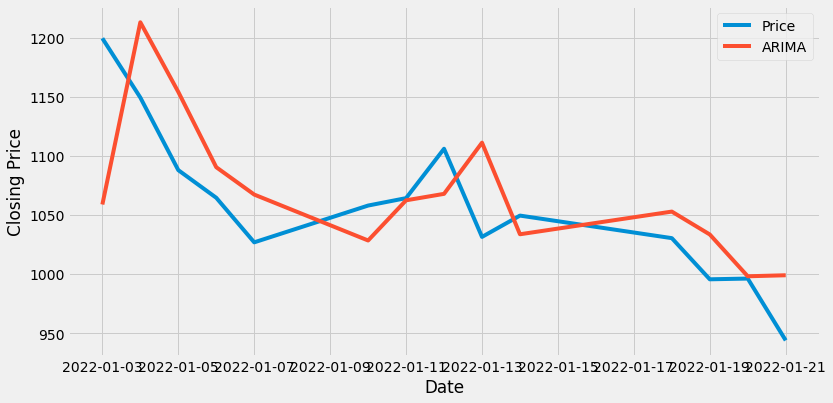

In [26]:
#ARIMA - Proper model which puts the differentiation into prediction
#How will be my model performance for the next 1 day
from statsmodels.tsa.arima_model import ARIMA
X = df['Close'].values
size = np.sum(df['Date'] <= '2021-12-31')
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order=(1,1,0)) #Order p,q,d
  model_fit = model.fit()
  output = model_fit.forecast()
  #Take the first value
  yhat = output[0]
  predictions.append(yhat)

  #append yhat - history to find the actual performance for ndays
  obs = test[t]
  history.append(obs)
 

test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')
test.index = pd.to_datetime(test.index)
test.loc[:,'ARIMA'] = predictions



plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.plot(test['ARIMA'],label='ARIMA')
#plt.plot(test['2-day EMA'],label='2-day EMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


    

In [29]:
test.head(10)

,Close,10-day SMA,2-day SMA,10-day WMA,10-day EMA,2-day EMA,ARIMA
Date,,,,,,,
2022-01-03,1199.780029,1050.984,1128.280,1086.309,1072.276,1154.182,[1059.0134709978]
2022-01-04,1149.589966,1075.949,1174.685,1104.237,1086.333,1151.121,[1213.3536815814668]
2022-01-05,1088.119995,1090.908,1118.855,1106.450,1086.658,1109.120,[1154.3722180261082]
2022-01-06,1064.699951,1096.491,1076.410,1101.685,1082.666,1079.507,[1090.595627608722]
2022-01-07,1026.959961,1092.487,1045.830,1089.043,1072.537,1044.476,[1067.4200180048863]
2022-01-10,1058.119995,1088.905,1042.540,1082.795,1069.916,1053.572,[1028.52584755763]
2022-01-11,1064.400024,1086.498,1061.260,1078.339,1068.913,1060.791,[1062.5512110351249]
2022-01-12,1106.219971,1088.501,1085.310,1081.925,1075.696,1091.077,[1068.032607456777]
2022-01-13,1031.560059,1084.623,1068.890,1071.572,1067.671,1051.399,[1111.37789370371]


In [32]:
#Train MAPE comparison
#Model selection to be done
#Future prediction based on the selected models
from sklearn.metrics import mean_absolute_percentage_error
arima_mape = mean_absolute_percentage_error(test['Close'],test['ARIMA'])
ema2_mape = mean_absolute_percentage_error(test['Close'],test['2-day EMA'])
ema10_mape = mean_absolute_percentage_error(test['Close'],test['10-day EMA'])
wma10_mape = mean_absolute_percentage_error(test['Close'],test['10-day WMA'])
sma2_mape = mean_absolute_percentage_error(test['Close'],test['2-day SMA'])
sma10_mape = mean_absolute_percentage_error(test['Close'],test['10-day SMA'])

In [41]:
mape_dict = {}
mape_dict = {'arima_mape':arima_mape, 'ema2_mape': ema2_mape, 
                'ema10_mape': ema10_mape, 'wma10_mape' : wma10_mape,
                'sma2_mape':sma2_mape, 'sma10_mape':sma10_mape}
print(mape_dict)

{'arima_mape': 0.04103044470292854, 'ema2_mape': 0.01253396375571944, 'ema10_mape': 0.036934978322164316, 'wma10_mape': 0.03861576026692677, 'sma2_mape': 0.019659388651813287, 'sma10_mape': 0.04740862829195325}
